In [3]:
!pip install pandas
!pip install numpy
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np 
import tensorflow
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [82]:
url = "https://raw.githubusercontent.com/Raziqizzan03/TPM/main/ANN/data_pelatihan.csv"
dt = pd.read_csv(url)
dt.head()

,id,topografi,pekerjaan_utama,prop_pln,bhn_bakar_masak,pemukiman_kumuh,pemukiman_bantaran,jml_paud_tk,jml_sd_sederajat,jml_smp_sederajat,jml_sma_sederajat,jml_akademi_pt,jml_rs_rsb,jml_puskesmas_pustu,jml_poli_dokter,jml_bersalin_bidan,jml_poskesdes_polindes,jml_dr_drg,jml_bank,status
0,PDS-24482,1,1,0.535354,2,2,1,8,2,1,0,0,0,1,0,1,1,0,0,DESA
1,PDS-19092,3,1,0.762611,2,1,2,1,6,2,0,0,0,1,0,2,0,0,0,DESA
2,PDS-1428,3,4,0.996604,2,2,2,4,6,1,1,1,0,0,5,3,1,4,4,DESA
3,PDS-18470,3,1,1.000000,2,2,2,2,4,1,1,0,0,0,0,2,1,0,0,DESA
4,PDS-16186,3,1,1.000000,2,2,1,2,2,1,2,0,0,0,0,1,1,0,0,DESA


In [83]:
# Ubah kolom 'col1' menjadi kategori
dt['topografi'] = dt['topografi'].astype('category')
dt['pekerjaan_utama'] = dt['pekerjaan_utama'].astype('category')
dt['bhn_bakar_masak'] = dt['bhn_bakar_masak'].astype('category')
dt['pemukiman_kumuh'] = dt['pemukiman_kumuh'].astype('category')
dt['pemukiman_bantaran'] = dt['pemukiman_bantaran'].astype('category')

dt.dtypes

id                          object
topografi                 category
pekerjaan_utama           category
prop_pln                   float64
bhn_bakar_masak           category
pemukiman_kumuh           category
pemukiman_bantaran        category
jml_paud_tk                  int64
jml_sd_sederajat             int64
jml_smp_sederajat            int64
jml_sma_sederajat            int64
jml_akademi_pt               int64
jml_rs_rsb                   int64
jml_puskesmas_pustu          int64
jml_poli_dokter              int64
jml_bersalin_bidan           int64
jml_poskesdes_polindes       int64
jml_dr_drg                   int64
jml_bank                     int64
status                      object
dtype: object

In [84]:
y = dt.status
list = ['id','status']
x = dt.drop(list, axis = 1)
x.head()
y.head()

0    DESA
1    DESA
2    DESA
3    DESA
4    DESA
Name: status, dtype: object

In [90]:
dt.dtypes

id                          object
topografi                 category
pekerjaan_utama           category
prop_pln                   float64
bhn_bakar_masak           category
pemukiman_kumuh           category
pemukiman_bantaran        category
jml_paud_tk                  int64
jml_sd_sederajat             int64
jml_smp_sederajat            int64
jml_sma_sederajat            int64
jml_akademi_pt               int64
jml_rs_rsb                   int64
jml_puskesmas_pustu          int64
jml_poli_dokter              int64
jml_bersalin_bidan           int64
jml_poskesdes_polindes       int64
jml_dr_drg                   int64
jml_bank                     int64
status                      object
dtype: object

status
DESA         17991
KELURAHAN     2224
Name: count, dtype: int64

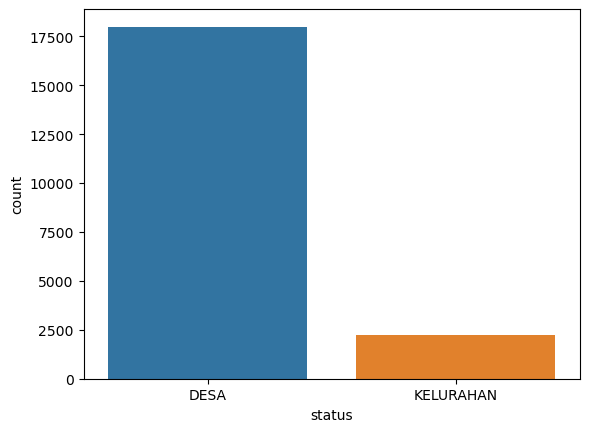

In [5]:
sns.countplot(x="status",data=dt) 
dt.loc[:,'status'].value_counts()

# Splitting data

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

# Over dan under sampling

In [86]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

# Oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

# Pembangunan model

In [87]:
rf = RandomForestClassifier()
rf.fit(X_train_under, y_train_under)

y_pr = rf.predict(x_test)
akurasi = accuracy_score(y_test, y_pr)
print("nilai akurasi =", akurasi)

nilai akurasi = 0.8736087064061341


In [89]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pr)

# Dari confusion matrix, kita dapat menghitung true positive, false positive, true negative, dan false negative
tn, fp, fn, tp = cm.ravel()

# Hitung sensitivitas (true positive rate)
sensitivity = tp / (tp + fn)

# Hitung spesifisitas (true negative rate)
specificity = tn / (tn + fp)
balance_akurasi = (sensitivity+specificity)/2
print("Sensitivitas:", sensitivity)
print("Spesifisitas:", specificity)
print("balance akurasi =", balance_akurasi)

Sensitivitas: 0.8675213675213675
Spesifisitas: 0.8744055944055944
balance akurasi = 0.870963480963481


# Hyperparameter Tuning

In [11]:
param_dist = {'n_estimators': range(100,150),
              'max_depth': range(1,20),
              'min_samples_split': range(2,10),
              'min_samples_leaf': range(1,10) }

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': range(1, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(100, 150)})

In [12]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 125, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 18}


In [14]:
# Mendapatkan balance akurasi pada setiap fold cross-validation
cv_results = pd.DataFrame(rand_search.cv_results_)

# Memilih kolom-kolom yang relevan (misalnya, parameter-parameter yang diuji dan skor akurasi)
relevant_columns = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']

# Menyimpan hasil ke dalam DataFrame
results_df = cv_results[relevant_columns]

print(results_df)

  param_n_estimators param_max_depth param_min_samples_split  \
0                125              18                       7   
1                124               8                       8   
2                124               6                       6   
3                107              11                       4   
4                121               4                       7   

  param_min_samples_leaf  mean_test_score  std_test_score  
0                      4         0.915532        0.010953  
1                      9         0.891335        0.006991  
2                      5         0.883676        0.006945  
3                      9         0.899475        0.009581  
4                      8         0.876165        0.006834  


# Prediksi

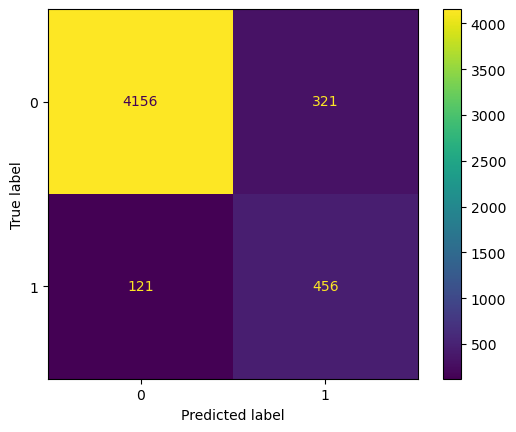

In [15]:
# Generate predictions with the best model
y_pr_h = best_rf.predict(x_test)

# Create the confusion matrix
cm1 = confusion_matrix(y_test, y_pr_h)

ConfusionMatrixDisplay(confusion_matrix=cm1).plot();

# Cek akurasi

In [16]:
akurasi_h = accuracy_score(y_test, y_pr_h)
# Hitung spesifisitas (true negative rate)
# Dari confusion matrix, kita dapat menghitung true positive, false positive, true negative, dan false negative
tn1, fp1, fn1, tp1 = cm1.ravel()

# Hitung sensitivitas (true positive rate)
sensitivity1 = tp1 / (tp1 + fn1)
specificity1 = tn1 / (tn1 + fp1)
balance_akurasi1 = (sensitivity1+specificity1)/2
print("Sensitivitas:", sensitivity1)
print("Spesifisitas:", specificity1)
print("balance akurasi =", balance_akurasi1)
print("nilai akurasi =", akurasi_h)

Sensitivitas: 0.7902946273830156
Spesifisitas: 0.9283002010274738
balance akurasi = 0.8592974142052447
nilai akurasi = 0.9125445191927186


# UJI data test 

In [31]:
url1 = "https://raw.githubusercontent.com/Raziqizzan03/TPM/main/ANN/data_untuk_prediksi.csv"
dt_test = pd.read_csv(url1)
dt_test.head()

,id,topografi,pekerjaan_utama,prop_pln,bhn_bakar_masak,pemukiman_kumuh,pemukiman_bantaran,jml_paud_tk,jml_sd_sederajat,jml_smp_sederajat,jml_sma_sederajat,jml_akademi_pt,jml_rs_rsb,jml_puskesmas_pustu,jml_poli_dokter,jml_bersalin_bidan,jml_poskesdes_polindes,jml_dr_drg,jml_bank
0,PDS-0010,3,1,1.0,2,1,1,6,3,1,2,0,0,1,2,4,1,1,0
1,PDS-0012,3,4,1.0,2,1,2,4,3,1,1,0,0,1,11,2,0,10,8
2,PDS-0014,3,1,1.0,2,2,2,2,1,0,0,0,0,0,0,0,1,0,0
3,PDS-0017,3,3,1.0,2,2,0,4,3,1,1,0,0,1,2,3,0,2,0
4,PDS-0025,3,1,1.0,2,2,2,4,6,0,0,0,0,1,2,2,1,1,1


In [32]:
xt = dt_test.drop('id',axis = 1)
xt.head()

,topografi,pekerjaan_utama,prop_pln,bhn_bakar_masak,pemukiman_kumuh,pemukiman_bantaran,jml_paud_tk,jml_sd_sederajat,jml_smp_sederajat,jml_sma_sederajat,jml_akademi_pt,jml_rs_rsb,jml_puskesmas_pustu,jml_poli_dokter,jml_bersalin_bidan,jml_poskesdes_polindes,jml_dr_drg,jml_bank
0,3,1,1.0,2,1,1,6,3,1,2,0,0,1,2,4,1,1,0
1,3,4,1.0,2,1,2,4,3,1,1,0,0,1,11,2,0,10,8
2,3,1,1.0,2,2,2,2,1,0,0,0,0,0,0,0,1,0,0
3,3,3,1.0,2,2,0,4,3,1,1,0,0,1,2,3,0,2,0
4,3,1,1.0,2,2,2,4,6,0,0,0,0,1,2,2,1,1,1


In [33]:
# Generate predictions with the best model
y_pr_test = rf.predict(xt)
print(y_pr_test)

['KELURAHAN' 'KELURAHAN' 'DESA' ... 'DESA' 'DESA' 'DESA']


In [34]:
url2 = "https://raw.githubusercontent.com/Raziqizzan03/TPM/main/ANN/template_submit.csv"
dt_kumpul = pd.read_csv(url2)
dt_kumpul['status'] = y_pr_test
dt_kumpul.head()

,id,status
0,PDS-0010,KELURAHAN
1,PDS-0012,KELURAHAN
2,PDS-0014,DESA
3,PDS-0017,KELURAHAN
4,PDS-0025,DESA


# Simpan data hasil prediksi

In [35]:

dt_kumpul.to_csv("data_rajik17.csv", index=False)

# GBM

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
# Initialize the GBM model
gradient_booster = GradientBoostingClassifier(random_state=40)
gradient_booster.get_params()

gradient_booster.fit(X_train_under, y_train_under)

y_pr_GBM = gradient_booster.predict(x_test)


In [7]:
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [92]:
# Hitung confusion matrix
cm2 = confusion_matrix(y_test, y_pr_GBM)

# Dari confusion matrix, kita dapat menghitung true positive, false positive, true negative, dan false negative
tn2, fp2, fn2, tp2 = cm2.ravel()

# Hitung sensitivitas (true positive rate)
sensitivity2 = tp2 / (tp2 + fn2)

# Hitung spesifisitas (true negative rate)
specificity2 = tn2 / (tn2 + fp2)
balance_akurasi2 = (sensitivity2+specificity2)/2
print("Sensitivitas:", sensitivity2)
print("Spesifisitas:", specificity2)
print("balance akurasi =", balance_akurasi2)

Sensitivitas: 0.8611111111111112
Spesifisitas: 0.8867132867132868
balance akurasi = 0.873912198912199


In [97]:
param_dist1 = {'n_estimators': range(100,400),
              'max_depth': range(1,30),
              'min_samples_split': range(2, 10),
              'min_samples_leaf': range(1, 10) }

# Create a random forest classifier
gbmt = GradientBoostingClassifier()

# Use random search to find the best hyperparameters
rand_searchgbm = RandomizedSearchCV(gbmt, 
                                 param_distributions = param_dist1, 
                                 n_iter=20, 
                                 cv=5)

# Fit the random search object to the data
rand_searchgbm.fit(X_train_under, y_train_under)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(100, 400)})

In [98]:
bestgbm = rand_searchgbm.best_estimator_
bestgbm.get_params()

y_gbmt = bestgbm.predict(x_test)
bestgbm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 311,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [99]:
# Mendapatkan balance akurasi pada setiap fold cross-validation
cv_results2 = pd.DataFrame(rand_searchgbm.cv_results_)

# Memilih kolom-kolom yang relevan (misalnya, parameter-parameter yang diuji dan skor akurasi)
relevant_columns2 = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']

# Menyimpan hasil ke dalam DataFrame
results_df2 = cv_results2[relevant_columns2]

# Sorting DataFrame based on 'mean_test_score' column in descending order
sorted_results_df2 = results_df2.sort_values(by='mean_test_score', ascending=False)

print(sorted_results_df2)

   param_n_estimators param_max_depth param_min_samples_split  \
19                311               5                       6   
11                208               5                       9   
4                 154              22                       9   
7                 226              12                       4   
2                 183               6                       6   
6                 102              23                       8   
5                 212               8                       8   
18                367               7                       9   
12                263               6                       8   
1                 317              13                       4   
9                 325              23                       9   
13                217              27                       9   
16                166              16                       5   
3                 228              27                       7   
17                268    

In [65]:
!pip install xgboost
!pip install lightgbm
!pip install catboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 409.6 kB/s eta 0:04:04
   ---------------------------------------- 0.1/99.8 MB 359.3 kB/s eta 0:04:38
   ---------------------------------------- 0.1/99.8 MB 469.7 kB/s eta 0:03:33
   ---------------------------------------- 0.1/99.8 MB 532.5 kB/s eta 0:03:08
   ---------------------------------------- 0.2/99.8 MB 562.0 kB/s eta 0:02:58
   ------------------------

In [72]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada data target
y_encoded = label_encoder.fit_transform(y_train)
y_encoded1 = label_encoder.fit_transform(y_train_resampled)

In [73]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_resampled, y_encoded1)

# Membuat prediksi
y_pred_xgb = xgb_model.predict(x_test)

y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

In [78]:
import lightgbm as lgb

# Contoh penggunaan LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_lgb = lgb_model.predict(x_test)

[LightGBM] [Info] Number of positive: 13514, number of negative: 13514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 27028, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [83]:
from catboost import CatBoostClassifier

# Contoh penggunaan CatBoost
ctb_model = CatBoostClassifier()
ctb_model.fit(X_train_resampled, y_train_resampled)
y_pred_ctb = ctb_model.predict(x_test)

Learning rate set to 0.042104
0:	learn: 0.6536578	total: 34.7ms	remaining: 34.6s
1:	learn: 0.6177286	total: 67.4ms	remaining: 33.6s
2:	learn: 0.5842564	total: 107ms	remaining: 35.5s
3:	learn: 0.5538290	total: 142ms	remaining: 35.3s
4:	learn: 0.5307370	total: 214ms	remaining: 42.6s
5:	learn: 0.5060793	total: 295ms	remaining: 48.9s
6:	learn: 0.4848727	total: 340ms	remaining: 48.3s
7:	learn: 0.4655374	total: 370ms	remaining: 45.9s
8:	learn: 0.4492094	total: 397ms	remaining: 43.8s
9:	learn: 0.4344870	total: 430ms	remaining: 42.6s
10:	learn: 0.4215180	total: 456ms	remaining: 41s
11:	learn: 0.4100573	total: 474ms	remaining: 39.1s
12:	learn: 0.3983452	total: 494ms	remaining: 37.5s
13:	learn: 0.3888271	total: 511ms	remaining: 36s
14:	learn: 0.3807172	total: 528ms	remaining: 34.7s
15:	learn: 0.3738801	total: 549ms	remaining: 33.8s
16:	learn: 0.3673528	total: 570ms	remaining: 33s
17:	learn: 0.3613874	total: 589ms	remaining: 32.1s
18:	learn: 0.3563621	total: 605ms	remaining: 31.2s
19:	learn: 0.35

In [100]:
# Hitung confusion matrix
cm3 = confusion_matrix(y_test, y_gbmt)

# Dari confusion matrix, kita dapat menghitung true positive, false positive, true negative, dan false negative
tn3, fp3, fn3, tp3 = cm3.ravel()

# Hitung sensitivitas (true positive rate)
sensitivity3 = tp3 / (tp3 + fn3)

# Hitung spesifisitas (true negative rate)
specificity3 = tn3 / (tn3 + fp3)
balance_akurasi3 = (sensitivity3+specificity3)/2
print("Sensitivitas:", sensitivity3)
print("Spesifisitas:", specificity3)
print("balance akurasi =", balance_akurasi3)

Sensitivitas: 0.8547008547008547
Spesifisitas: 0.8682517482517482
balance akurasi = 0.8614763014763014


# SMOTE

In [44]:
pip install --upgrade scikit-learn imbalanced-learn



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [22]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada data latih saja
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print(y_train_resampled.isnull().values.any())
print(X_train_resampled.isnull().values.any())
print(dt.isnull().values.any())


False
False
False


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Memanggil fungsi fit_transform untuk menstandarisasi data train
X_train_scaled = scaler.fit_transform(x_train)
X_train_scaleds = scaler.fit_transform(X_train_resampled)




In [8]:
X_train_resampled['topografi'] = X_train_resampled['topografi'].astype('category')
X_train_resampled['pekerjaan_utama'] = X_train_resampled['pekerjaan_utama'].astype('category')
X_train_resampled['bhn_bakar_masak'] = X_train_resampled['bhn_bakar_masak'].astype('category')
X_train_resampled['pemukiman_kumuh'] = X_train_resampled['pemukiman_kumuh'].astype('category')
X_train_resampled['pemukiman_bantaran'] = X_train_resampled['pemukiman_bantaran'].astype('category')
X_train_resampled.dtypes


topografi                 category
pekerjaan_utama           category
prop_pln                   float64
bhn_bakar_masak           category
pemukiman_kumuh           category
pemukiman_bantaran        category
jml_paud_tk                  int64
jml_sd_sederajat             int64
jml_smp_sederajat            int64
jml_sma_sederajat            int64
jml_akademi_pt               int64
jml_rs_rsb                   int64
jml_puskesmas_pustu          int64
jml_poli_dokter              int64
jml_bersalin_bidan           int64
jml_poskesdes_polindes       int64
jml_dr_drg                   int64
jml_bank                     int64
dtype: object

In [7]:
# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier()

# Melatih model menggunakan data yang telah di-resampling
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi pada data uji
y_pred_rf = rf_classifier.predict(x_test)

In [8]:
# Hitung confusion matrix
cm4 = confusion_matrix(y_test, y_pred_rf)

# Dari confusion matrix, kita dapat menghitung true positive, false positive, true negative, dan false negative
tn4, fp4, fn4, tp4 = cm4.ravel()

# Hitung sensitivitas (true positive rate)
sensitivity4 = tp4 / (tp4 + fn4)

# Hitung spesifisitas (true negative rate)
specificity4 = tn4 / (tn4 + fp4)
balance_akurasi4 = (sensitivity4+specificity4)/2
print("Sensitivitas:", sensitivity4)
print("Spesifisitas:", specificity4)
print("balance akurasi =", balance_akurasi4)

Sensitivitas: 0.7402912621359223
Spesifisitas: 0.9267419443679427
balance akurasi = 0.8335166032519326


In [71]:
url2 = "https://raw.githubusercontent.com/Raziqizzan03/TPM/main/ANN/data_untuk_prediksi.csv"
dt_test = pd.read_csv(url2)
dt_test.head()

,id,topografi,pekerjaan_utama,prop_pln,bhn_bakar_masak,pemukiman_kumuh,pemukiman_bantaran,jml_paud_tk,jml_sd_sederajat,jml_smp_sederajat,jml_sma_sederajat,jml_akademi_pt,jml_rs_rsb,jml_puskesmas_pustu,jml_poli_dokter,jml_bersalin_bidan,jml_poskesdes_polindes,jml_dr_drg,jml_bank
0,PDS-0010,3,1,1.0,2,1,1,6,3,1,2,0,0,1,2,4,1,1,0
1,PDS-0012,3,4,1.0,2,1,2,4,3,1,1,0,0,1,11,2,0,10,8
2,PDS-0014,3,1,1.0,2,2,2,2,1,0,0,0,0,0,0,0,1,0,0
3,PDS-0017,3,3,1.0,2,2,0,4,3,1,1,0,0,1,2,3,0,2,0
4,PDS-0025,3,1,1.0,2,2,2,4,6,0,0,0,0,1,2,2,1,1,1


In [72]:
xt = dt_test.drop('id',axis = 1)
xt.head()

,topografi,pekerjaan_utama,prop_pln,bhn_bakar_masak,pemukiman_kumuh,pemukiman_bantaran,jml_paud_tk,jml_sd_sederajat,jml_smp_sederajat,jml_sma_sederajat,jml_akademi_pt,jml_rs_rsb,jml_puskesmas_pustu,jml_poli_dokter,jml_bersalin_bidan,jml_poskesdes_polindes,jml_dr_drg,jml_bank
0,3,1,1.0,2,1,1,6,3,1,2,0,0,1,2,4,1,1,0
1,3,4,1.0,2,1,2,4,3,1,1,0,0,1,11,2,0,10,8
2,3,1,1.0,2,2,2,2,1,0,0,0,0,0,0,0,1,0,0
3,3,3,1.0,2,2,0,4,3,1,1,0,0,1,2,3,0,2,0
4,3,1,1.0,2,2,2,4,6,0,0,0,0,1,2,2,1,1,1


In [73]:
# Generate predictions with the best model
y_pr_test2 = bestbrft.predict(xt)
print(y_pr_test2)

['KELURAHAN' 'KELURAHAN' 'DESA' ... 'DESA' 'DESA' 'DESA']


In [74]:
url3 = "https://raw.githubusercontent.com/Raziqizzan03/TPM/main/ANN/template_submit.csv"
dt_kumpul = pd.read_csv(url3)
dt_kumpul['status'] = y_pr_test2
dt_kumpul.head()

,id,status
0,PDS-0010,KELURAHAN
1,PDS-0012,KELURAHAN
2,PDS-0014,DESA
3,PDS-0017,KELURAHAN
4,PDS-0025,DESA


In [75]:
dt_kumpul.to_csv("data_rajik22.csv", index=False)

# RandomForestBlance

In [93]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=40)
brf.fit(X_train_under, y_train_under)
y_pr_brf = brf.predict(x_test)

c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


In [32]:
brf.get_params()

{'bootstrap': 'warn',
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'replacement': 'warn',
 'sampling_strategy': 'warn',
 'verbose': 0,
 'warm_start': False}

In [21]:
x_train.dtypes

topografi                   int64
pekerjaan_utama             int64
prop_pln                  float64
bhn_bakar_masak             int64
pemukiman_kumuh             int64
pemukiman_bantaran          int64
jml_paud_tk                 int64
jml_sd_sederajat            int64
jml_smp_sederajat           int64
jml_sma_sederajat           int64
jml_akademi_pt              int64
jml_rs_rsb                  int64
jml_puskesmas_pustu         int64
jml_poli_dokter             int64
jml_bersalin_bidan          int64
jml_poskesdes_polindes      int64
jml_dr_drg                  int64
jml_bank                    int64
dtype: object

In [67]:
param_dist2 = {'n_estimators': range(100,400),
              'max_depth': range(1,30),
              'min_samples_split': range(2, 10),
              'min_samples_leaf': range(1, 10) }

# Create a random forest classifier
brft = BalancedRandomForestClassifier()

# Use random search to find the best hyperparameters
rand_searchbrft = RandomizedSearchCV(brft, 
                                 param_distributions = param_dist2, 
                                 n_iter=20, 
                                 cv=5)

# Fit the random search object to the data
rand_searchbrft.fit(X_train_under, y_train_under)


c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\User\ana

RandomizedSearchCV(cv=5, estimator=BalancedRandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(100, 400)})

In [68]:
bestbrft = rand_searchbrft.best_estimator_

y_brft = bestbrft.predict(x_test)
bestbrft.get_params()

{'bootstrap': 'warn',
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 383,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'replacement': 'warn',
 'sampling_strategy': 'warn',
 'verbose': 0,
 'warm_start': False}

In [69]:
# Mendapatkan balance akurasi pada setiap fold cross-validation
cv_results1 = pd.DataFrame(rand_searchbrft.cv_results_)

# Memilih kolom-kolom yang relevan (misalnya, parameter-parameter yang diuji dan skor akurasi)
relevant_columns1 = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']

# Menyimpan hasil ke dalam DataFrame
results_df1 = cv_results1[relevant_columns1]

# Sorting DataFrame based on 'mean_test_score' column in descending order
sorted_results_df1 = results_df1.sort_values(by='mean_test_score', ascending=False)

print(sorted_results_df1)

   param_n_estimators param_max_depth param_min_samples_split  \
2                 383              18                       2   
16                377               8                       9   
6                 134              17                       8   
18                121              19                       3   
1                 352              29                       4   
10                394              20                       9   
19                270              12                       6   
8                 345              29                       7   
9                 322              21                       8   
11                137               5                       2   
0                 368               8                       6   
15                327               8                       3   
4                 286              14                       4   
14                378              12                       5   
12                253    

In [59]:
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

rusboost = RUSBoostClassifier(random_state=42)
rusboost.fit(x_train, y_train)

# Membuat prediksi
y_pred_rusboost = rusboost.predict(x_test)

eec = EasyEnsembleClassifier(random_state=42)
eec.fit(x_train, y_train)

# Membuat prediksi
y_pred_eec = eec.predict(x_test)

In [96]:
# Hitung confusion matrix
cm5 = confusion_matrix(y_test, y_pr_brf)

# Dari confusion matrix, kita dapat menghitung true positive, false positive, true negative, dan false negative
tn5, fp5, fn5, tp5 = cm5.ravel()

# Hitung sensitivitas (true positive rate)
sensitivity5 = tp5 / (tp5 + fn5)

# Hitung spesifisitas (true negative rate)
specificity5 = tn5 / (tn5 + fp5)
balance_akurasi5 = (sensitivity5 + specificity5)/2
print("Sensitivitas:", sensitivity5)
print("Spesifisitas:", specificity5)
print("balance akurasi =", balance_akurasi5)

Sensitivitas: 0.8653846153846154
Spesifisitas: 0.8727272727272727
balance akurasi = 0.869055944055944


# SVM

In [68]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train_resampled, y_train_resampled)
#Predict the response for test dataset
y_pr_svm = clf.predict(x_test)

In [69]:
# Hitung confusion matrix
cm6 = confusion_matrix(y_test, y_pr_svm)

# Dari confusion matrix, kita dapat menghitung true positive, false positive, true negative, dan false negative
tn6, fp6, fn6, tp6 = cm6.ravel()

# Hitung sensitivitas (true positive rate)
sensitivity6 = tp6 / (tp6 + fn6)

# Hitung spesifisitas (true negative rate)
specificity6 = tn6 / (tn6 + fp6)
balance_akurasi6 = (sensitivity6 + specificity6)/2
print("Sensitivitas:", sensitivity6)
print("Spesifisitas:", specificity6)
print("balance akurasi =", balance_akurasi6)

Sensitivitas: 0.7660311958405546
Spesifisitas: 0.9180254634800089
balance akurasi = 0.8420283296602817
